# pysat demo using data from ACE SWEPAM

In [10]:
import datetime as dt
import matplotlib.pyplot as plt

import pysat
import pysatSpaceWeather

import warnings
warnings.filterwarnings("ignore", message="'S' is deprecated and will be removed in a future version, please use 's' instead.")
print(pysat.params['data_dirs'])

['/home/jovyan/scratch_space/.pysat']


In [11]:
# Set data directory if user hasn't already set one
print(f"old: {pysat.params['data_dirs']}")
if len(pysat.params['data_dirs']) == 0 or pysat.params['data_dirs'] == ['.']:
    # Set a directory for pysat to use for data
    pysat.params['data_dirs'] = '/home/jovyan/scratch_space/.pysat/'
else:
    print('pysat directory has been set previously. Leaving unchanged.')

print(f"new: {pysat.params['data_dirs']}")

old: ['/home/jovyan/scratch_space/.pysat']
pysat directory has been set previously. Leaving unchanged.
new: ['/home/jovyan/scratch_space/.pysat']


In [12]:
# Register instruments with pysat. Only needed once per install.
pysat.utils.registry.register_by_module(pysatSpaceWeather.instruments)

In [13]:
# Instantiate a pysat Instrument that will use support in 
# pysatSpaceWeather for ACE Space Weather data.
ace = pysat.Instrument('ace', 'swepam', tag='historic')

In [14]:
# Learn about the ACE platform and SWEPAM instrument
help(ace.inst_module)

Help on module pysatSpaceWeather.instruments.ace_swepam in pysatSpaceWeather.instruments:

NAME
    pysatSpaceWeather.instruments.ace_swepam - Supports ACE Solar Wind Electron Proton Alpha Monitor data.

DESCRIPTION
    Properties
    ----------
    platform
        'ace' Advanced Composition Explorer
    name
        'swepam' Solar Wind Electron Proton Alpha Monitor
    tag
        - 'realtime' Real-time data from the Space Weather Prediction Center (SWPC)
        - 'historic' Historic data from the SWPC
    inst_id
        - ''
    
    Note
    ----
    This is not the ACE scientific data set, which will be available at pysatNASA
    
    Examples
    --------
    The real-time data is stored by generation date, where each file contains the
    data for the current day.  If you leave download dates empty, though, it will
    grab today's file three times and assign dates from yesterday, today, and
    tomorrow.
    ::
    
    
        swepam = pysat.Instrument('ace', 'swepam', tag=

In [15]:
# Learn about the ace pysat.Instrument object
print(ace)

pysat Instrument object
-----------------------
Platform: 'ace'
Name: 'swepam'
Tag: 'historic'
Instrument id: ''

Data Processing
---------------
Cleaning Level: 'clean'
Data Padding: None
Custom Functions: 0 applied

Local File Statistics
---------------------
Number of files: 31
Date Range: 01 July 2021 --- 31 July 2021

Loaded Data Statistics
----------------------
No loaded data.



In [17]:
# Download data for July, 2021. We shouldn't need to do this now
# ace.download(dt.datetime(2021, 7, 1), dt.datetime(2021, 7, 31))

In [16]:
# Load all data
ace.load()

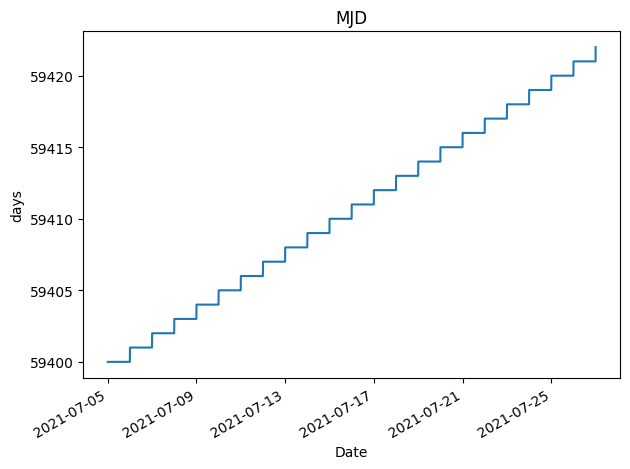

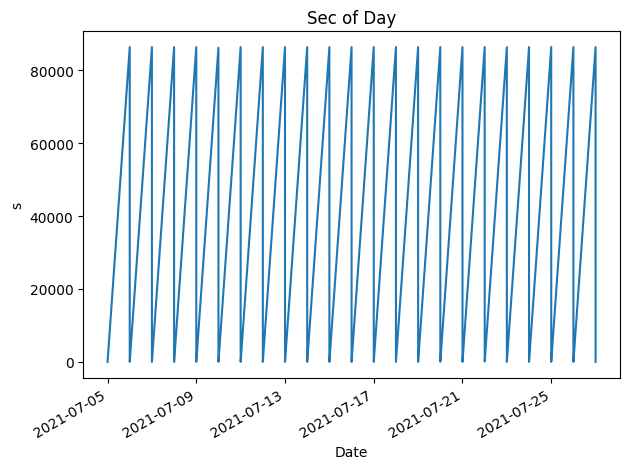

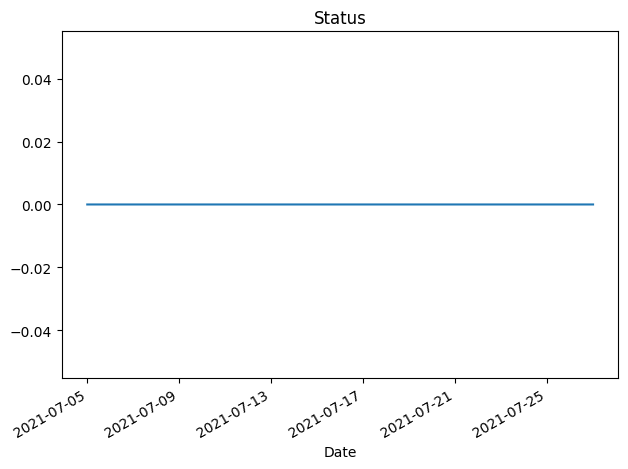

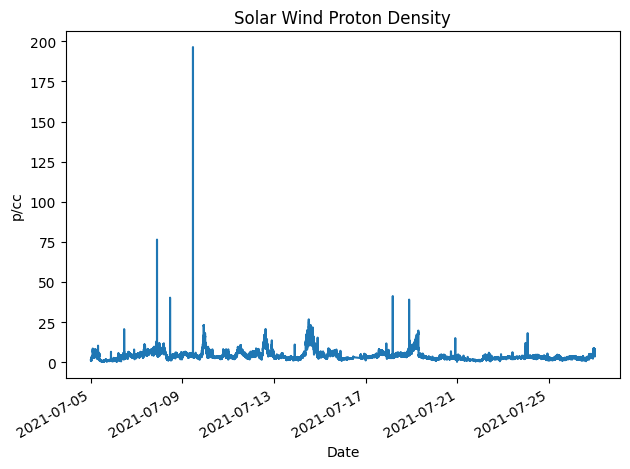

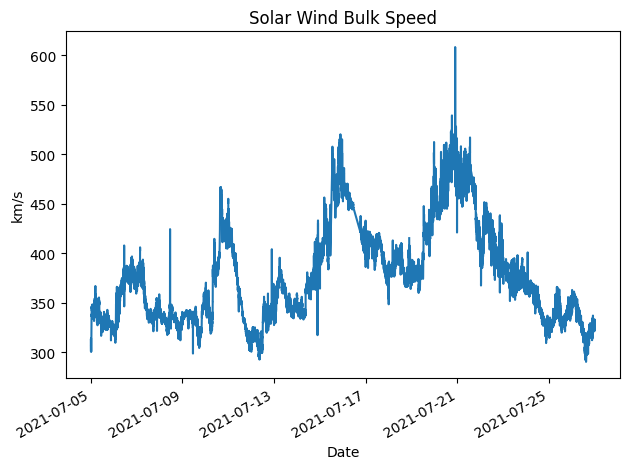

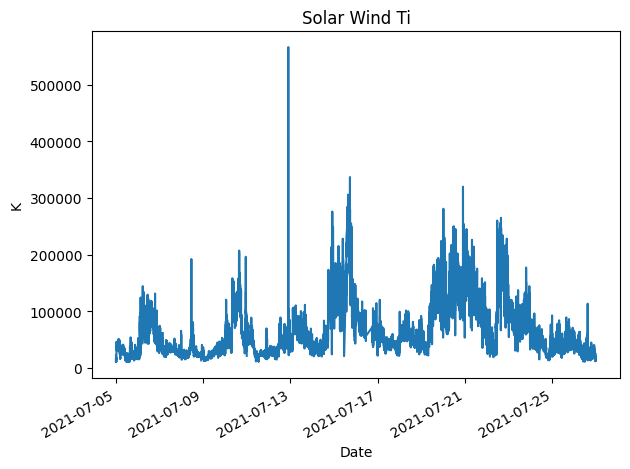

In [10]:
# Make plot of all variables in July, 2021
sdate = dt.datetime(2021, 7, 5)
edate = dt.datetime(2021, 7, 27)
for var in ace.variables:
    plt.figure()
    units = ace.meta[var, ace.meta.labels.units]
    title = ace.meta[var, ace.meta.labels.name]

    ace[sdate:edate, var].plot(title=title, ylabel=units, 
                               xlabel='Date')
    plt.tight_layout()
    plt.savefig(''.join([var, '_example.jpg']))
